# MNIST 손글씨 일반 Neural Network

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
# 데이터 전처리
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline

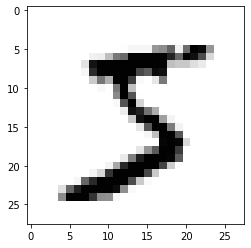

In [5]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write(f'{i:3d} ')
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [7]:

# 0 ~ 1 사이의 값으로 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:

# 3차원 데이터를 2차원으로 (데이터는 2차원을 1차원으로)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [9]:

# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
# 모델 정의 , 설정, 실행, 평가
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:

model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 48)                24624     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                490       
Total params: 427,034
Trainable params: 427,034
Non-trainable params: 0
_________________________________________________________________


In [12]:

model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [13]:
# 모델 최적화를 위한 설정
modelpath = 'model/best_mnist_dnn.h5'
checkpoint = ModelCheckpoint(modelpath, verbose=1, save_best_only=True)
early_stopping = EarlyStopping(patience=10)

In [14]:

history = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=50, batch_size=200, verbose=0,
    callbacks=[checkpoint, early_stopping]
)


Epoch 00001: val_loss improved from inf to 0.17246, saving model to model\best_mnist_dnn.h5

Epoch 00002: val_loss improved from 0.17246 to 0.11588, saving model to model\best_mnist_dnn.h5

Epoch 00003: val_loss improved from 0.11588 to 0.09664, saving model to model\best_mnist_dnn.h5

Epoch 00004: val_loss improved from 0.09664 to 0.08474, saving model to model\best_mnist_dnn.h5

Epoch 00005: val_loss improved from 0.08474 to 0.08035, saving model to model\best_mnist_dnn.h5

Epoch 00006: val_loss did not improve from 0.08035

Epoch 00007: val_loss improved from 0.08035 to 0.07779, saving model to model\best_mnist_dnn.h5

Epoch 00008: val_loss did not improve from 0.07779

Epoch 00009: val_loss did not improve from 0.07779

Epoch 00010: val_loss did not improve from 0.07779

Epoch 00011: val_loss did not improve from 0.07779

Epoch 00012: val_loss did not improve from 0.07779

Epoch 00013: val_loss did not improve from 0.07779

Epoch 00014: val_loss did not improve from 0.07779

Epoch

In [15]:

from tensorflow.keras.models import load_model
best_model = load_model(modelpath)
best_model.evaluate(X_test, Y_test)

OSError: SavedModel file does not exist at: model/best_mnist_dnn.h5/{saved_model.pbtxt|saved_model.pb}

In [16]:
# 학습과정 시각화
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

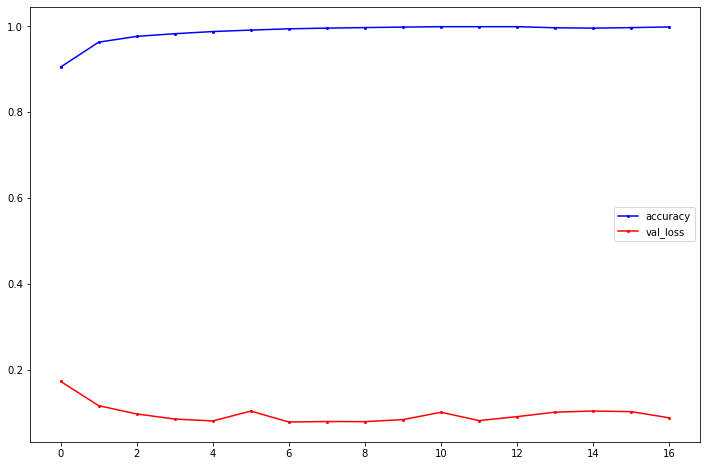

In [17]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()